## 1. Defining the Question

### a) Specifying the Data Analytic Question

to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics

### b) Defining the Metric for Success

Randomly partition each dataset into two parts i.e 80 - 20  sets.

For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

### c) Understanding the context 

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters

### d) Recording the Experimental Design



*   upload and read our csv files
*   clean our dataset
*   perfom EDA
*   build our models using KNN
*   build our models using Naive Bayes
*   challenge our solueion




### e) Data Relevance

In [ ]:
Dataset 1 Source: [Train Dataset Source: https://archive.org/download/train5_202002/train%20%285%29.csv (Links to an external site.), Test Dataset Source: https://archive.org/download/test1_202002/test%20%281%29.csv (Links to an external site.)]
Dataset 2 Source: [https://archive.ics.uci.edu/ml/datasets/Spambase (Links to an external site.)]

these are the columns of our dataset
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton



## 2. Reading the Data

In [87]:
%matplotlib inline

#importing our necessary libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# Loading the Data from the source i.e. csv

# ---
#
train_df= pd.read_csv("/content/train (5).csv")


In [8]:
test_df= pd.read_csv("/content/test (1).csv")




## 3. Checking the Data

In [10]:
# Determining the no. of records in our dataset
#
train_df.shape

(891, 12)

In [11]:
test_df.shape

(418, 11)

In [12]:
# Previewing the top of our dataset
#
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Previewing the bottom of our dataset
# 
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
# Checking whether each column has an appropriate datatype
#
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
#
train_df

In [16]:
# Checking for Anomalies
#
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [17]:
# Identifying the Missing Data
#
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mean())

In [35]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
# Checking statistical summary of the dataset
train_df.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chronopoulos, Mr. Apostolos",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
# More data cleaning procedures
## checking for duplicated file
#
train_df.duplicated().sum()

0

In [30]:
#we will change our columns to numeric
# 1 is male, 0 is female for sex
train_df['Sex'].replace(['male', 'female'],[1,0],inplace=True)

#C = Cherbourg as -1, Q = Queenstown as 0, S = Southampton as 1
train_df['Embarked'].replace(['C', 'Q', 'S'],[-1,0,1],inplace=True)


In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,-1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [36]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
#we will create a clean df leaving out unnecessary columns like PassengerId, Name and Cabin(since it has alot of missing values)
clean_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [40]:
clean_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 6. Exploratory Analysis

In [88]:
# Let's display the correlations between the variables
correlations = clean_df.corr()

correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.169411
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.164226
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.110092
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.028819
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068882
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.040438
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.226075
Embarked,-0.169411,0.164226,0.110092,-0.028819,0.068882,0.040438,-0.226075,1.000000


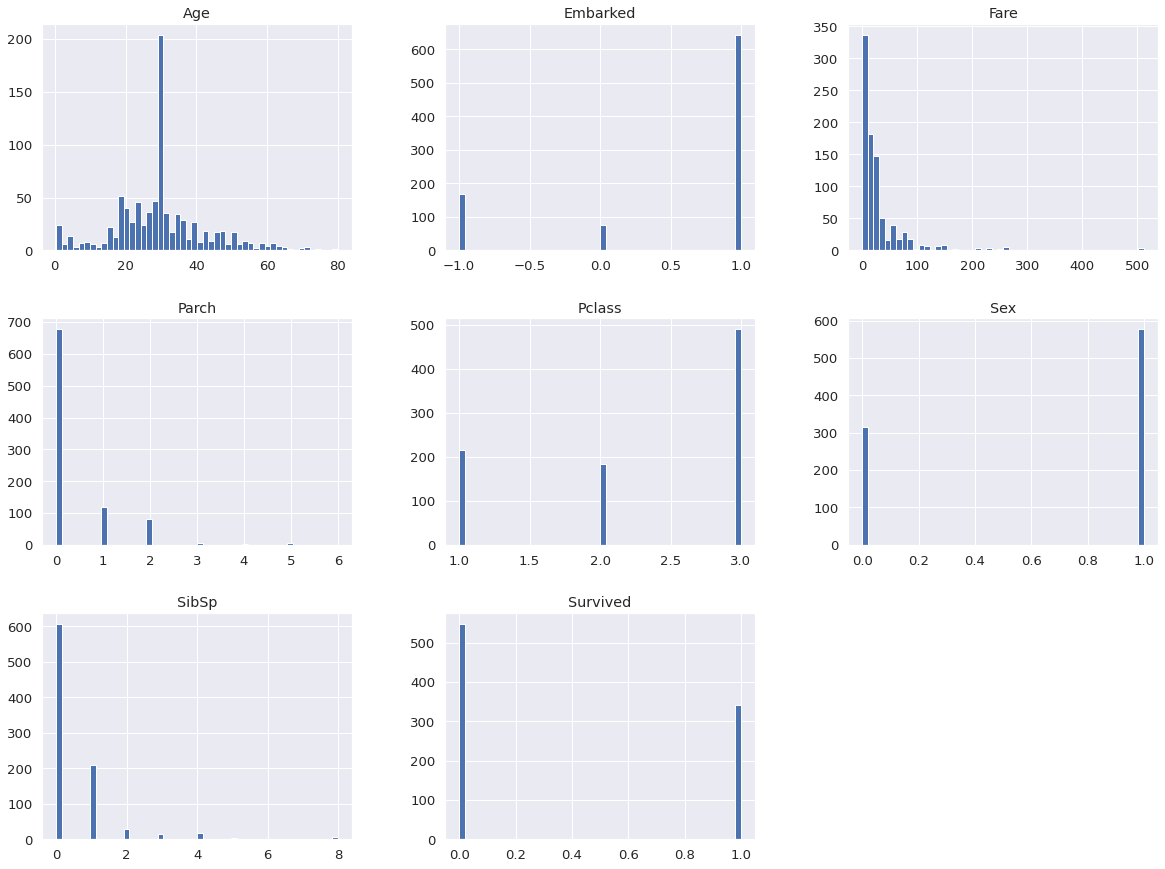

In [89]:
#Distribution plot
clean_df.hist(bins=50,figsize=(20,15))
plt.show()

#we can see most survivers were women
#3rd class were most affected
#children that did not have parents were affected most
#people that embarked at Southampton got affected most

**K Nearest Neighbours**

In [67]:
# Splitting our dataset into its attributes and labels
# ---
# 
X = clean_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = clean_df['Survived'].values

In [68]:
# Train Test Split
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [69]:
# Feature Scaling
# ---

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
#we want to find the best value of k and it must be odd number

math.sqrt(len(y_test))

13.379088160259652

In [72]:
# Training and Predictions
# ---
# 

classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [73]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [74]:
# Evaluating the Algorithm
# ---
# 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[110   7]
 [ 26  36]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       117
           1       0.84      0.58      0.69        62

    accuracy                           0.82       179
   macro avg       0.82      0.76      0.78       179
weighted avg       0.82      0.82      0.81       179

0.8156424581005587


**spliting our data 70- 30**

In [75]:
# Splitting our dataset into its attributes and labels
# ---
# 
X = clean_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = clean_df['Survived'].values

In [76]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [77]:
# Feature Scaling
# ---

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# Training and Predictions
# ---
classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [79]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [80]:
# Evaluating the Algorithm
# ---
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[140  28]
 [ 24  76]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       168
           1       0.73      0.76      0.75       100

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268

0.8059701492537313


**spliting our data 60- 40**

In [81]:
# Splitting our dataset into its attributes and labels
# ---
# 
X = clean_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = clean_df['Survived'].values

In [82]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [83]:
# Feature Scaling
# ---
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Training and Predictions
# ---

classifier = KNeighborsClassifier(n_neighbors=13, p=2, metric= 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [85]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [86]:
# Evaluating the Algorithm
# ---
# 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[187  32]
 [ 36 102]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       219
           1       0.76      0.74      0.75       138

    accuracy                           0.81       357
   macro avg       0.80      0.80      0.80       357
weighted avg       0.81      0.81      0.81       357

0.8095238095238095


## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# after splittint our data to 80-20 we get 82% accuracy level and other two at 81%

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

yes

### b). Do we need other data to answer our question?

no

### c). Did we have the right question?

yes
